## Analisis Data Supermarket Sales (Myanmar)

---



In [30]:
# import library

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [31]:
# load dataset
df = pd.read_csv('/content/drive/MyDrive/Dataset/Supermarket Sales.csv')
df

,Date,Payment,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity
0,1/5/2019,Ewallet,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7
1,3/8/2019,Cash,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5
2,3/3/2019,Credit card,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7
3,1/27/2019,Ewallet,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8
4,2/8/2019,Ewallet,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7
...,...,...,...,...,...,...,...,...,...,...
995,1/29/2019,Ewallet,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1
996,3/2/2019,Ewallet,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10
997,2/9/2019,Cash,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1
998,2/22/2019,Cash,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1


In [32]:
# cek shape
df.shape

(1000, 10)

In [33]:
# cek informasi
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1000 non-null   object 
 1   Payment        1000 non-null   object 
 2   Invoice ID     1000 non-null   object 
 3   Branch         1000 non-null   object 
 4   City           1000 non-null   object 
 5   Customer type  1000 non-null   object 
 6   Gender         1000 non-null   object 
 7   Product line   1000 non-null   object 
 8   Unit price     1000 non-null   float64
 9   Quantity       1000 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 78.2+ KB


In [34]:
# cek data NaN
df.isna().sum()

Date             0
Payment          0
Invoice ID       0
Branch           0
City             0
Customer type    0
Gender           0
Product line     0
Unit price       0
Quantity         0
dtype: int64

In [35]:
# cek duplikasi data
df.duplicated().sum()

0

In [36]:
# cek nunique
df.nunique()

Date               89
Payment             3
Invoice ID       1000
Branch              3
City                3
Customer type       2
Gender              5
Product line        6
Unit price        943
Quantity           10
dtype: int64

In [37]:
# cek value count pada data object
col = df.select_dtypes(include=['object']).columns
for i in col:
  print(df[i].value_counts(), '\n')

2/7/2019     20
2/15/2019    19
3/14/2019    18
3/2/2019     18
1/8/2019     18
             ..
1/4/2019      6
2/28/2019     6
2/21/2019     6
3/17/2019     6
2/1/2019      6
Name: Date, Length: 89, dtype: int64 

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64 

750-67-8428    1
642-61-4706    1
816-72-8853    1
491-38-3499    1
322-02-2271    1
              ..
633-09-3463    1
374-17-3652    1
378-07-7001    1
433-75-6987    1
849-09-3807    1
Name: Invoice ID, Length: 1000, dtype: int64 

A    340
B    332
C    328
Name: Branch, dtype: int64 

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64 

Member    501
Normal    499
Name: Customer type, dtype: int64 

Female    498
Male      490
male        9
female      2
fml         1
Name: Gender, dtype: int64 

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty

In [38]:
# cleaning data : type data kolom Date
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           1000 non-null   datetime64[ns]
 1   Payment        1000 non-null   object        
 2   Invoice ID     1000 non-null   object        
 3   Branch         1000 non-null   object        
 4   City           1000 non-null   object        
 5   Customer type  1000 non-null   object        
 6   Gender         1000 non-null   object        
 7   Product line   1000 non-null   object        
 8   Unit price     1000 non-null   float64       
 9   Quantity       1000 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 78.2+ KB


In [39]:
# cleaning data : kolom Gender
df['Gender'] = df['Gender'].str.replace('Male', 'male')

gender_female = ['Female', 'fml']
for i in gender_female:
  df['Gender'] = df['Gender'].str.replace(i, 'female')

df['Gender'].value_counts()

female    501
male      499
Name: Gender, dtype: int64

In [40]:
# cleaning data : kolom total_sales = Unit price * Quantity
df['total_sales'] = df['Unit price'] * df['Quantity']
df['total_sales'] = df['total_sales'].round(2)
df

,Date,Payment,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,total_sales
0,2019-01-05,Ewallet,750-67-8428,A,Yangon,Member,female,Health and beauty,74.69,7,522.83
1,2019-03-08,Cash,226-31-3081,C,Naypyitaw,Normal,female,Electronic accessories,15.28,5,76.40
2,2019-03-03,Credit card,631-41-3108,A,Yangon,Normal,male,Home and lifestyle,46.33,7,324.31
3,2019-01-27,Ewallet,123-19-1176,A,Yangon,Member,male,Health and beauty,58.22,8,465.76
4,2019-02-08,Ewallet,373-73-7910,A,Yangon,Normal,male,Sports and travel,86.31,7,604.17
...,...,...,...,...,...,...,...,...,...,...,...
995,2019-01-29,Ewallet,233-67-5758,C,Naypyitaw,Normal,male,Health and beauty,40.35,1,40.35
996,2019-03-02,Ewallet,303-96-2227,B,Mandalay,Normal,female,Home and lifestyle,97.38,10,973.80
997,2019-02-09,Cash,727-02-1313,A,Yangon,Member,male,Food and beverages,31.84,1,31.84
998,2019-02-22,Cash,347-56-2442,A,Yangon,Normal,male,Home and lifestyle,65.82,1,65.82


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           1000 non-null   datetime64[ns]
 1   Payment        1000 non-null   object        
 2   Invoice ID     1000 non-null   object        
 3   Branch         1000 non-null   object        
 4   City           1000 non-null   object        
 5   Customer type  1000 non-null   object        
 6   Gender         1000 non-null   object        
 7   Product line   1000 non-null   object        
 8   Unit price     1000 non-null   float64       
 9   Quantity       1000 non-null   int64         
 10  total_sales    1000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 86.1+ KB


In [42]:
# save to csv
df.to_csv('/content/drive/MyDrive/Dataset/New Supermarket Sales.csv')

### Analisis dan Visualisasi data

In [43]:
# deskripsi dataset
df.describe()

,Unit price,Quantity,total_sales
count,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,307.58738
std,26.494628,2.923431,234.17651
min,10.080000,1.000000,10.17000
25%,32.875000,3.000000,118.49750
50%,55.230000,5.000000,241.76000
75%,77.935000,8.000000,448.90500
max,99.960000,10.000000,993.00000


#### 1. Payment

In [44]:
payment_count = df['Payment'].value_counts()
fig = px.pie(payment_count, names=payment_count.index, values=payment_count.values)
fig.update_layout(
    title='Number of Payment',
    height=400,
    width=400
)
fig.show()

Analisis: Mayoritas customer menggunakan E-Wallet sebagai metode pembayaran.

In [45]:
# payment by city
payment_city = df.groupby(['City', 'Payment'])['Payment'].count().reset_index(name='Total')
fig = px.bar(payment_city, x='City', y='Total', color='Payment', text_auto=True, barmode='group')
fig.update_layout(
    title='Most Payment Method by City',
    width=800,
    height=450
)
fig.show()

Analisis : Sebagian besar customer dari kota Mandalay dan Yangon menggunakan metode pembayaran E-Wallet sementara kebanyakan customer dari kota Naypyitaw menggunakan metode pembayaran berupa tunai (cash)

In [46]:
# payment by customer type
payment_customer = df.groupby(['Customer type', 'Payment'])['Customer type'].count().reset_index(name='total_count').sort_values(by='total_count',
                                                                                                                                 ascending=False)
fig = px.bar(payment_customer, x='Customer type', y='total_count', color='Payment', text_auto=True, barmode='group')
fig.update_layout(
    title='Most Payment Method by customer type',
    width=800,
    height=450
)
fig.show()

Analisis : sebagian besar jenis customer normal menggunakan metode pembayaran berupa E-wallet dan sebagian besar jenis customer member menggunakan metode pembayaran credit card

In [62]:
# most total sales by payment
payment_customer = df.groupby('Payment')['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending=False)
fig = px.bar(payment_customer, x='Payment', y='total_sales', text_auto=True)
fig.update_layout(
    title='Total sales by Payment Method',
    width=800,
    height=450
)
fig.show()

Analisis : Meskipun metode pembayaran E-wallet paling banyak digunakan, namun total penjualan tertinggi berasal dari metode pembayaran secara cash. ini menunjukkan bahwa customer lebih suka menggunakan metode cash ketika transaksi melibatkan jumlah yang sangat besar

#### 2. Product

In [47]:
product_sales = df['Product line'].value_counts().sort_values(ascending=True)
fig = px.bar(product_sales.sort_values(ascending=False), x=product_sales.values, y=product_sales.index, orientation='h', text_auto=True)
fig.update_layout(
    title='Most product sales',
    width=800,
    height=450
)
fig.update_xaxes(title='Total Count')
fig.update_yaxes(title='Product')
fig.show()

Analisis : Produk Fashion accessories merupakan produk yang paling laris terjual

In [48]:
product_gender = df.groupby(['Product line', 'Gender'])['Gender'].count().reset_index(name='Total count').sort_values(by='Total count', ascending=True)
fig = px.bar(product_gender, x='Total count', y='Product line', color='Gender', orientation='h', text_auto=True, barmode='stack')
fig.update_layout(
    title='Most product sales by Gender',
    width=800,
    height=450
)
fig.update_xaxes(title='Total Count')
fig.update_yaxes(title='Product')
fig.show()

Analisis : Mayoritas pembeli produk Health and Beauty adalah customer pria sedangkan mayoritas produk Fashion Accessories, Food and beverages dan Sports and travel adalah customer wanita. Hanya produk Home and lifestyle dan Electronic Accessories memiliki pembeli dengan jenis kelamin kurang lebih sama.

In [49]:
product_Payment = df.groupby(['Product line', 'Payment'])['Payment'].count().reset_index(name='Total count').sort_values(by='Total count', ascending=True)
fig = px.bar(product_Payment, y='Total count', x='Product line', color='Payment', text_auto=True, barmode='group')
fig.update_layout(
    title='Product vs Payment',
    width=900,
    height=450
)
fig.update_yaxes(title='Total Count')
fig.update_xaxes(title='Product')
fig.show()

Analisis : Sebagian besar customer lebih suka membeli produk Electronics accessories dengan transaksi tunai (cash). Customer juga lebih suka membeli produk Food and beverage dengan menggunakan credit card. Sementara itu customer cenderung membeli produk home and lifestyle, Health and beauty dan Fashion Accessories dengan menggunakan E-Wallet

In [21]:
product_City = df.groupby(['Product line', 'City'])['City'].count().reset_index(name='Total count').sort_values(by='Total count', ascending=True)
fig = px.bar(product_City, y='Total count', x='Product line', color='City', text_auto=True, barmode='group')
fig.update_layout(
    title='Product vs City',
    width=900,
    height=450
)
fig.update_yaxes(title='Total Count')
fig.update_xaxes(title='Product')
fig.show()

Analisis : Produk Home and lifestyle merupakan produk paling populer di kota Yangon. Kemudian produk Food and beverage lebih banyak diminati di kota Naypyitaw. Produk Sports and travel dan Fashion accessories adalah produk paling diminati oleh masyarakat di kota Mandalay

#### 3. Customer type

In [50]:
customer_by_gender = df.groupby(['Customer type', 'Gender'])['Gender'].count().reset_index(name='total_gender')
fig = px.bar(customer_by_gender, x='Customer type', y='total_gender', color='Gender', barmode='group', text_auto=True)
fig.update_layout(
    title='Customer type by Gender',
    width=900,
    height=450
)
fig.update_yaxes(title='Total Count')
fig.update_xaxes(title='Customer type')
fig.show()

Analisis : Mayoritas customer jenis Member adalah berjenis kelamin wanita sedangkan customer jenis Normal lebih banyak berjenis kelamin pria dibandingkan dengan wanita.

#### 4. Correlation between Unit price, Quantity and total_sales

<ipython-input-51-6522c2b4e5f9>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



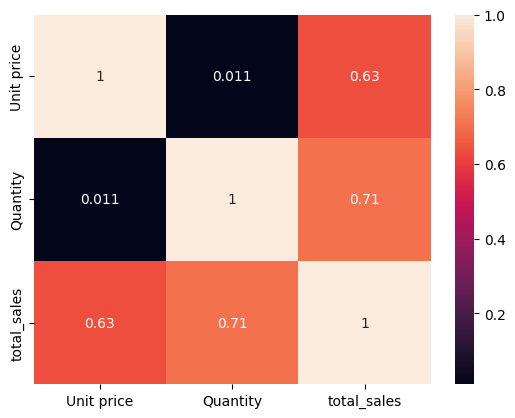

In [51]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [52]:
fig = px.scatter(df, x='Unit price', y='total_sales', trendline='ols')
fig.update_layout(
    title='Unit price vs total_sales',
    height=400,
    width=800
)
fig.show()

In [25]:
fig = px.scatter(df, x='Quantity', y='total_sales', trendline='ols')
fig.update_layout(
    title='Quantity vs total_sales',
    height=400,
    width=800
)
fig.show()

Analisis: Semakin tinggi unit price maka dapat mempengaruhi nilai total sales. Begitu juga quantity jika semakin banyak maka mempengaruhi nilai dari total sales. ini menandakan bahwa Quantity dan Unit Price berpengaruh terhadap total penjualan (total_sales)

#### 5. Total Sales

5.1 Product vs Total sales

In [26]:
total_sales_product = df.groupby('Product line')['total_sales'].sum().reset_index().sort_values(by='total_sales',
                                                                                          ascending=True)
fig = px.bar(total_sales_product, x='total_sales', y='Product line', orientation='h', text_auto=True)
fig.update_layout(
    title='Most Total Sales by Product',
    width=800,
    height=450
)
fig.update_xaxes(title='Total Sales')
fig.update_yaxes(title='Product')
fig.show()

Analisis : Total penjualan terbesar yaitu pada produk Food and beverages

5.2 Total sales by Customer type in City

In [27]:
fig = px.bar(df.groupby(['City', 'Customer type'])['total_sales'].sum().reset_index(),
             y='total_sales', x='City', color='Customer type', barmode='group', text_auto=True)
fig.update_layout(
    title='Total sales by customer type in city',
    width=600,
    height=450
)
fig.update_yaxes(title='Total Sales')
fig.update_xaxes(title='City')
fig.show()

Analisis : Total penjualan terbesar berasal dari kota Naypyitaw dengan customer jenis member

5.3 Total sales trend by month in City

In [28]:
df['Month'] = df['Date'].dt.month
df['Month'] = df['Month'].astype('object')
fig = px.bar(df.groupby(['City', 'Month'])['total_sales'].sum().reset_index(),
             y='total_sales', x='Month', color='City', barmode='group', text_auto=True)
fig.update_layout(
    title='Total sales trend by Month in city',
    width=600,
    height=450
)
fig.update_yaxes(title='Total Sales')
fig.update_xaxes(title='Month')
fig.show()

Analisis : Total penjualan disemua kota mengalami titik terendah pada bulan Februari dan total penjualan tertinggi terjadi pada bulan Januari. ini menunjukkan adanya tren penurunan penjualan dari Januari hingga Februari namun mengalami peningkatan pada bulan Maret

5.4 Daily trends on total sales in city

In [61]:
df['Day'] = df['Date'].dt.strftime('%A')
df['Day'] = pd.Categorical(df['Day'], categories=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
fig = px.line(df.groupby(['City', 'Day'])['total_sales'].sum().reset_index(),
              y='total_sales', x='Day', color='City')
fig.update_layout(
    title='Total sales trend by Day in city',
    height=450
)
fig.update_yaxes(title='Total Sales')
fig.update_xaxes(title='Day')
fig.show()

Analisis : Total penjualan tertinggi di semua kota terjadi pada hari sabtu. Namun total penjualan terendah di kota Mandalay dan Yangon yaitu pada hari rabu sementara di kota Naypyitaw terjadi pada hari kamis.

5.5 Monthly trend of total sales by customer type

In [59]:
df['Month'] = df['Date'].dt.month
fig = px.bar(df.groupby(['Customer type', 'Month'])['total_sales'].sum().reset_index(),
             y='total_sales', x='Month', color='Customer type', barmode='group', text_auto=True)
fig.update_layout(
    title='Monthly trend of total sales by Customer type',
    width=600,
    height=450
)
fig.update_yaxes(title='Total Sales')
fig.update_xaxes(title='Month')
fig.show()

Analisis : Titik terendah total penjualan dari kedua jenis customer terjadi pada bulan februari, sedangkan bulan januari adalah total penjualan tertinggi dari kedua jenis customer.



---


### Kesimpulan



1. Metode pembayaran E-wallet adalah metode pembayaran yang paling banyak digunakan oleh customer normal. Metode ini sebagian besar banyak digunakan di kota Mandalay dan Yangon. Namun customer lebih suka menggunakan metode pembayaran cash ketika melakukan transaksi dalam jumlah yang besar.
2. Produk Fashion and accessories adalah produk yang paling banyak dicari oleh customer.
3. Mayoritas pembeli produk Health and Beauty adalah customer pria sedangkan mayoritas produk Fashion Accessories, Food and beverages dan Sports and travel adalah customer wanita. Hanya produk Home and lifestyle dan Electronic Accessories memiliki pembeli dengan jenis kelamin kurang lebih sama
4. Sebagian besar customer lebih suka membeli produk Electronics accessories dengan transaksi tunai (cash). Customer juga lebih suka membeli produk Food and beverage dengan menggunakan credit card. Sementara itu customer cenderung membeli produk home and lifestyle, Health and beauty dan Fashion Accessories dengan menggunakan E-Wallet
5. Produk Home and lifestyle merupakan produk paling populer di kota Yangon. Kemudian produk Food and beverage lebih banyak diminati di kota Naypyitaw. Produk Sports and travel dan Fashion accessories adalah produk paling diminati oleh masyarakat di kota Mandalay
6. Mayoritas customer jenis Member adalah berjenis kelamin wanita sedangkan customer jenis Normal lebih banyak berjenis kelamin pria dibandingkan dengan wanita.
7. Total penjualan terbesar yaitu pada produk Food and beverages
8. Total penjualan terbesar berasal dari kota Naypyitaw dengan customer jenis member
9. Total penjualan tertinggi baik berdasarkan kota maupun jenis customer terjadi pada bulan Januari namun mengalami tren penurunan signifikan pada bulan februari
10. Total penjualan tertinggi di semua kota terjadi pada hari sabtu. Namun total penjualan terendah di kota Mandalay dan Yangon yaitu pada hari rabu sementara di kota Naypyitaw terjadi pada hari kamis.

Agar dapat memaksimalkan penjualan, maka supermarket perlu untuk:
1. membuat aplikasi belanja secara online agar pemanfaatan E-wallet semakin meningkat
2. melihat kebiasaan customer berbelanja suatu produk di berbagai kota berdasarkan data.
3. Meningkatkan customer member
4. mengadakan promo dan memasang iklan diwaktu tertentu untuk menarik banyak pelanggan dan mendapatkan banyak penghasilan.